In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from preprocessing import EraseDuplicatedElect, GetHzStartEndIdxByElec, GetHzStartEndIdxByEMG, signal_mV, calc_y

In [2]:

def plot_signal(dir_path, file, a, b):
    plt.figure(figsize=(10,5))
    file = file + '.txt'
    tmp_a, tmp_b = a, b
    if 'EMG' in file:
        file_lines = [i.split(',') for i in open(dir_path+ file).readlines()]
        # print(file_lines)
        emg_raw = [int(i) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        # elect_raw = [int(i[:2] == '11') for 
        #                     line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        # elect_raw = np.array(elect_raw)
        print(emg_raw)
        plt.plot(emg_raw[tmp_a:tmp_b])
        plt.ylim(0,255)
    else:
        

        file_lines = [i.replace('\t', '-').split('-') for i in open(dir_path+ file).readlines()]

        emg_raw = [int(i[2:]) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        elect_raw = [int(i[:2] == '11') for 
                            line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        elect_raw = np.array(elect_raw)

        elect_fixed = EraseDuplicatedElect(elect_raw)
        # start_idx, end_idx = GetHzStartEndIdxByElec(isElec=elect_fixed)
        idx = GetHzStartEndIdxByElec(isElec=elect_fixed)

        emg_raw = np.array(emg_raw)
        elect_fixed = np.array(elect_fixed)
        plt.plot(emg_raw[tmp_a:tmp_b])
        plt.ylim(0,255)

def highpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
        sos = signal.butter(poles, cutoff, 'highpass', fs=sample_rate, output='sos')
        filtered_data = signal.sosfiltfilt(sos, data)
        return filtered_data
def lowpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
        sos = signal.butter(poles, cutoff, 'lowpass', fs=sample_rate, output='sos')
        filtered_data = signal.sosfiltfilt(sos, data)
        return filtered_data
# hifiltered = highpass(temp, 180, Fs)

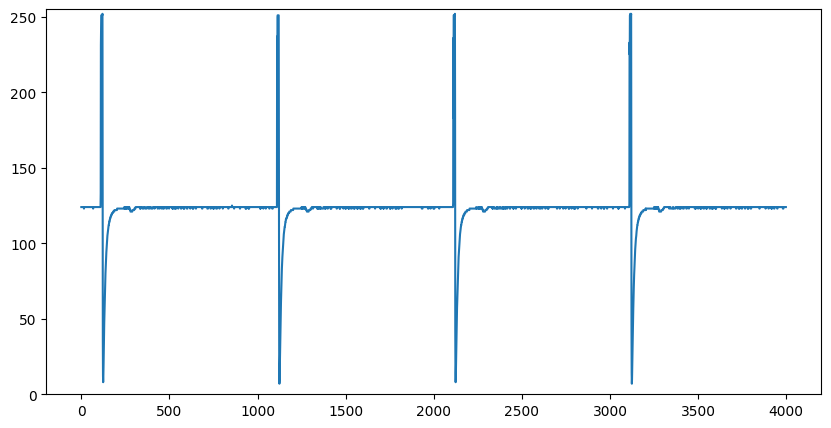

In [3]:
plot_signal('./Result_experiments/', 'Impulse_0_20240617141309_2_forearm_right', 0, -1)

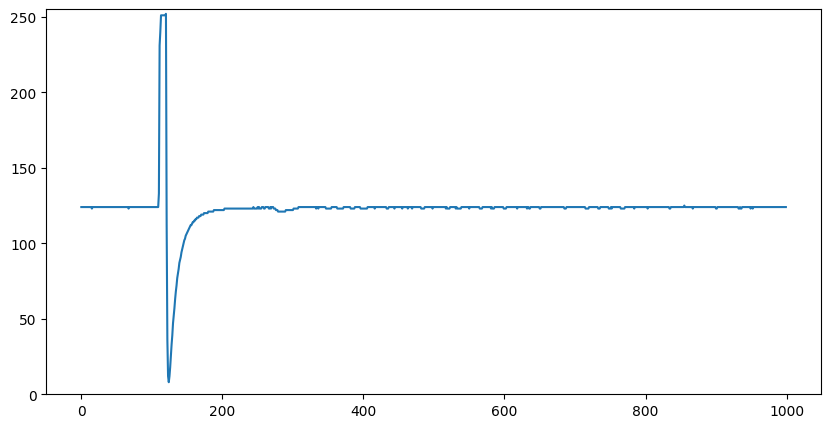

In [13]:
plot_signal('./Result_experiments/', 'Impulse_0_20240617141309_2_forearm_right', 0, 1000)

In [4]:
path = './Result_experiments/EMG.txt'

In [5]:
file_lines = [i.split(',') for i in open(path).readlines()]
# print(file_lines)


emg_raw = [float(line[0])*100 for 
                    line in file_lines]
a = emg_raw[1858: 2886]
b = emg_raw[8962: 9983]
c = emg_raw[16937: 17936]
d = emg_raw[24731: 25737]
e = emg_raw[32997: 34000]
f = emg_raw[42100: 43103]

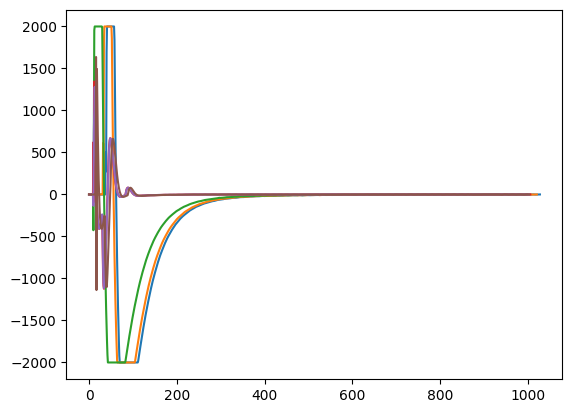

In [6]:
plt.figure()

plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.plot(d)
plt.plot(e)
plt.plot(f)

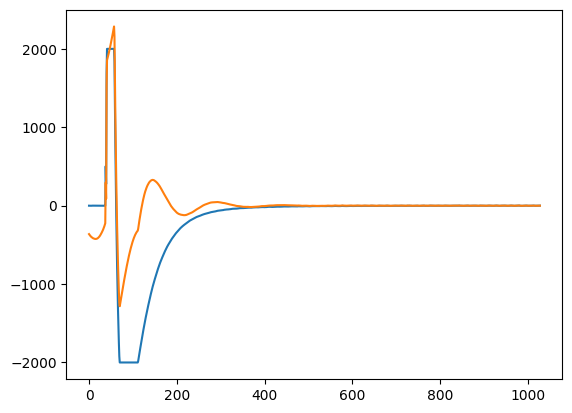

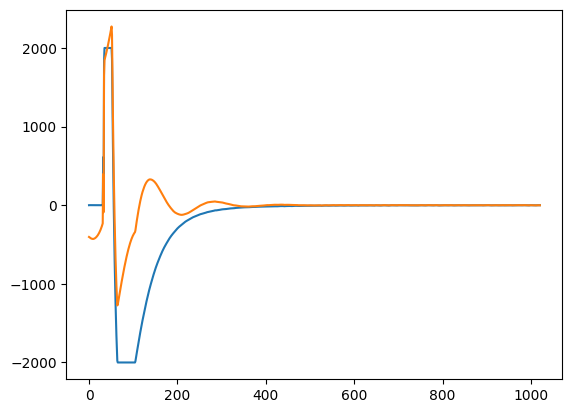

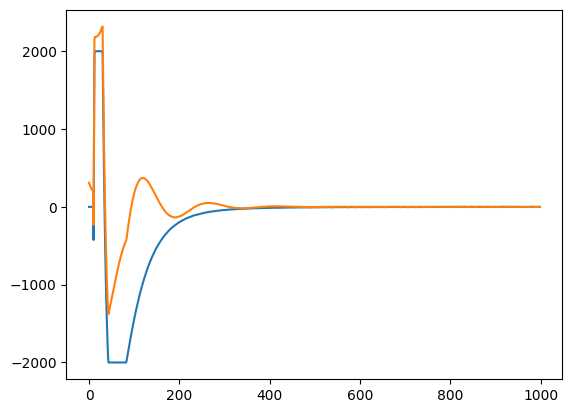

In [8]:
plt.figure()
plt.plot(a)
plt.plot(highpass(a, 7, 1000))

plt.figure()
plt.plot(b)
plt.plot(highpass(b, 7, 1000))

plt.figure()
plt.plot(c)
plt.plot(highpass(c, 7, 1000))

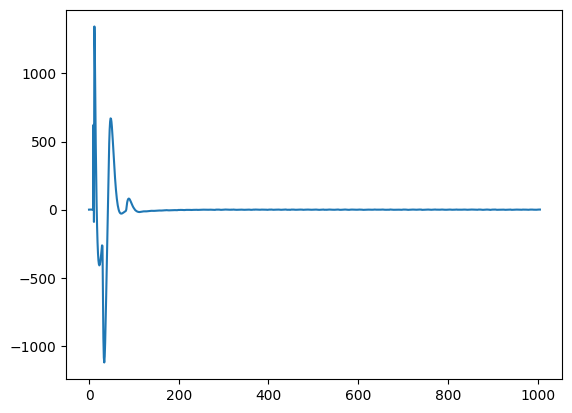

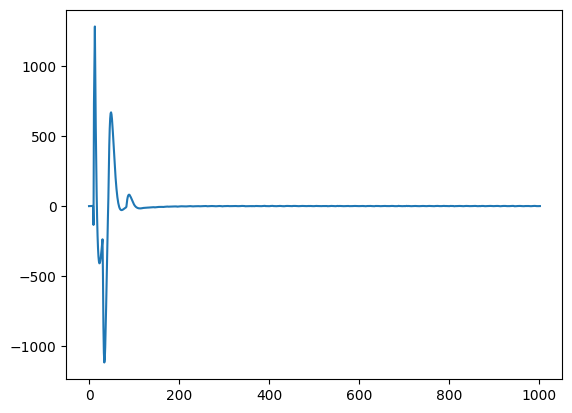

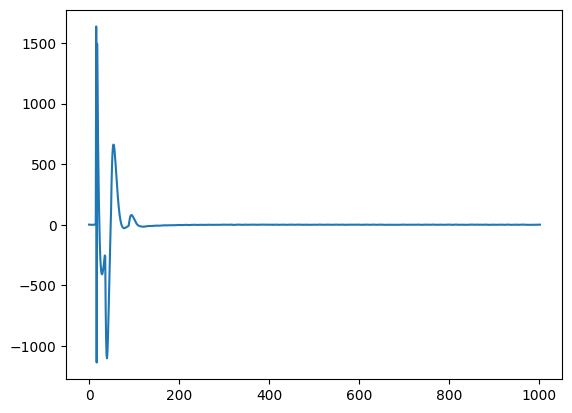

In [12]:
%matplotlib inline
plt.figure()
plt.plot(d)
# plt.plot(highpass(d, 7, 1000))

plt.figure()
plt.plot(e)
# plt.plot(highpass(e, 7, 1000))

plt.figure()
plt.plot(f)
# plt.plot(highpass(f, 7, 1000))